<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Number_of_Riders         1000 non-null   int64  
 1   Number_of_Drivers        1000 non-null   int64  
 2   Location_Category        1000 non-null   object 
 3   Customer_Loyalty_Status  1000 non-null   object 
 4   Number_of_Past_Rides     1000 non-null   int64  
 5   Average_Ratings          1000 non-null   float64
 6   Time_of_Booking          1000 non-null   object 
 7   Vehicle_Type             1000 non-null   object 
 8   Expected_Ride_Duration   1000 non-null   int64  
 9   Historical_Cost_of_Ride  1000 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 78.3+ KB
None
   Number_of_Riders  Number_of_Drivers Location_Category  \
0                90                 45             Urban   
1                58                 39          Suburban  

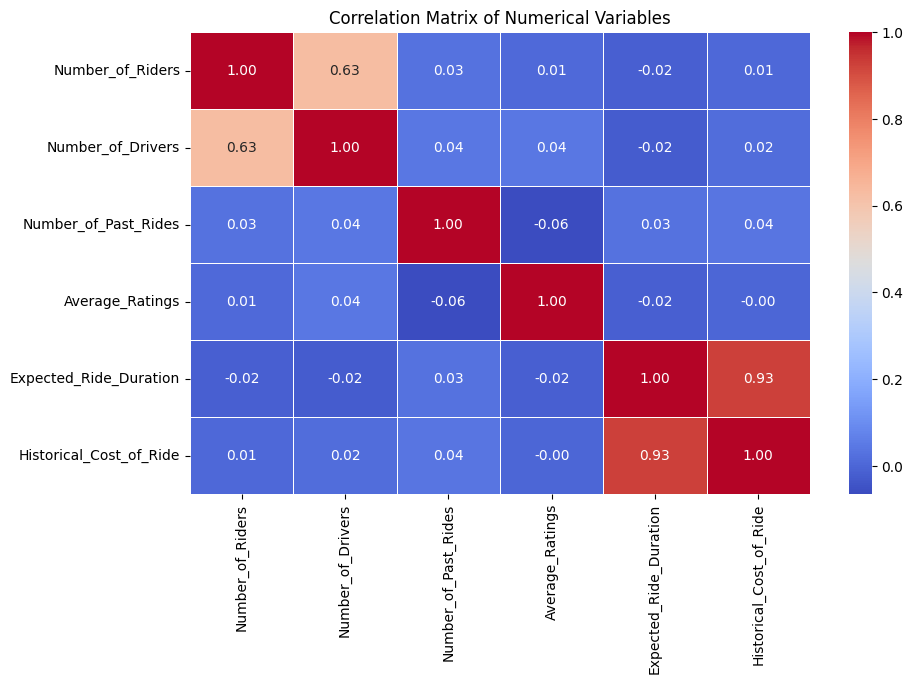

R-squared Score: 0.8752468282750773
                            Feature  Coefficient
12             Vehicle_Type_Premium    42.727863
3                   Average_Ratings     7.294497
8    Customer_Loyalty_Status_Silver     4.987830
7   Customer_Loyalty_Status_Regular     3.578693
4            Expected_Ride_Duration     3.533110
1                 Number_of_Drivers     0.473769
10          Time_of_Booking_Morning     0.433219
2              Number_of_Past_Rides     0.023371
0                  Number_of_Riders    -0.040834
11            Time_of_Booking_Night    -2.421640
5        Location_Category_Suburban    -3.176077
6           Location_Category_Urban    -4.005350
9           Time_of_Booking_Evening    -5.163414


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
file_path = "/content/dynamic_pricing.csv"
df = pd.read_csv(file_path)

# Display basic information
print(df.info())
print(df.head())

# Compute correlation matrix for numerical features
correlation_matrix = df.corr(numeric_only=True)

# Plot heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=["Location_Category", "Customer_Loyalty_Status", "Time_of_Booking", "Vehicle_Type"], drop_first=True)

# Define features and target variable
X = df_encoded.drop(columns=["Historical_Cost_of_Ride"])
y = df_encoded["Historical_Cost_of_Ride"]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Model performance
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

# Extract feature importance (coefficients)
feature_importance = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_}).sort_values(by="Coefficient", ascending=False)

# Display feature importance
print(feature_importance)
